In [22]:
from math import trunc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

In [3]:
def drop_outliers(df):
    col_interest = 'Victims Injured'
    q1 = df[col_interest].quantile(0.25)
    q3 = df[col_interest].quantile(0.75)
    iqr = q3 - q1
    outliers_removed = df[(df[col_interest] >= (q1 - 1.5 * iqr)) & (df[col_interest] <= (q3 + 1.5 * iqr))]
def proccess_data():
    data_path = 'Data/MergedGunData.csv'
    df = pd.read_csv(data_path)
    # Check for missing values
    missing_values = df.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df = df.dropna(subset=['Address'])
    #handle data parsing
    df['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df.sort_values(by='dates_proccessed')
    #Optional: write back proccessed data
    df.to_csv('ProcessedGunData.csv',index=False)

proccess_data()

Incident ID             0
Incident Date           0
State                   0
City Or County          0
Address                13
Victims Killed          0
Victims Injured         0
Suspects Killed         0
Suspects Injured        0
Suspects Arrested       0
Operations           3018
Year                    0
dtype: int64


In [35]:
'''
Summary of Total Killed and Injured 
'''

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)
print(df.columns)


Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations', 'Year',
       'dates_proccessed'],
      dtype='object')


In [ ]:


# Convert 'Incident Date' to datetime format
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Set the index to 'Incident Date'
df.set_index('Incident Date', inplace=True)

# Resample the data to get monthly totals
monthly_totals = df.resample('M').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_totals.index, monthly_totals['Victims Killed'], label='Total Victims Killed', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Victims Injured'], label='Total Victims Injured', marker='o')
plt.title('Total Victims Killed and Injured Per Month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

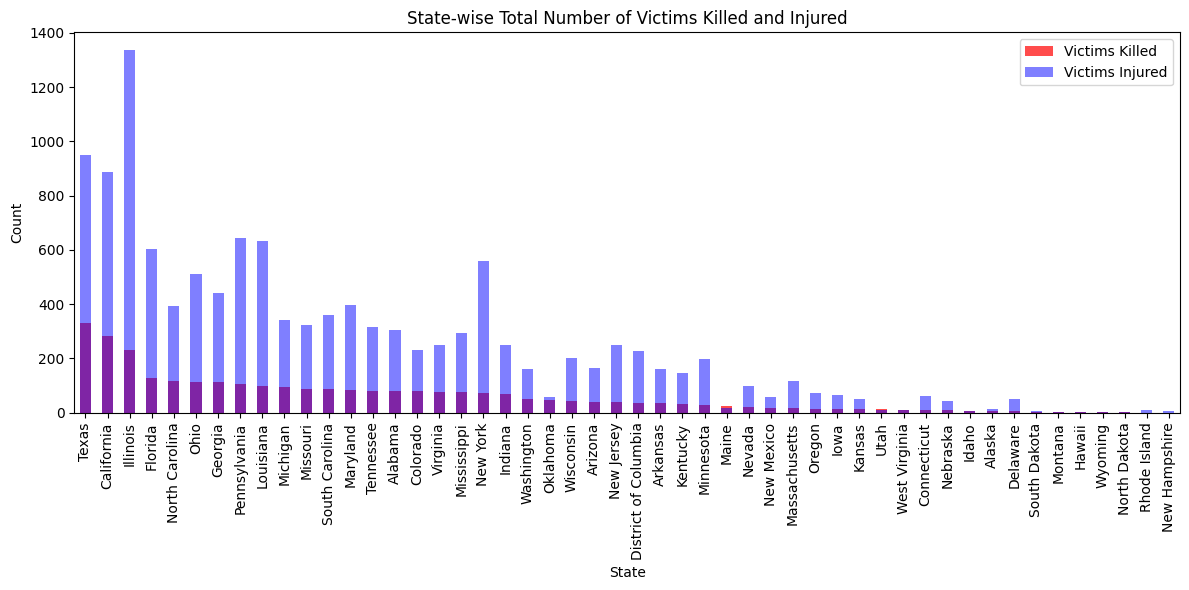

In [6]:
''' 
State-wise distribution of victims killed and injured
'''

file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Group by state and calculate the total number of victims killed and injured
state_totals = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'})

# Sort by the total number of victims killed for better visualization
state_totals = state_totals.sort_values(by='Victims Killed', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
state_totals['Victims Killed'].plot(kind='bar', color='red', alpha=0.7, label='Victims Killed')
state_totals['Victims Injured'].plot(kind='bar', color='blue', alpha=0.5, label='Victims Injured')

plt.title('State-wise Total Number of Victims Killed and Injured')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_16620\2435014191.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_fatality.index, y=city_fatality.values, palette='Blues_d')


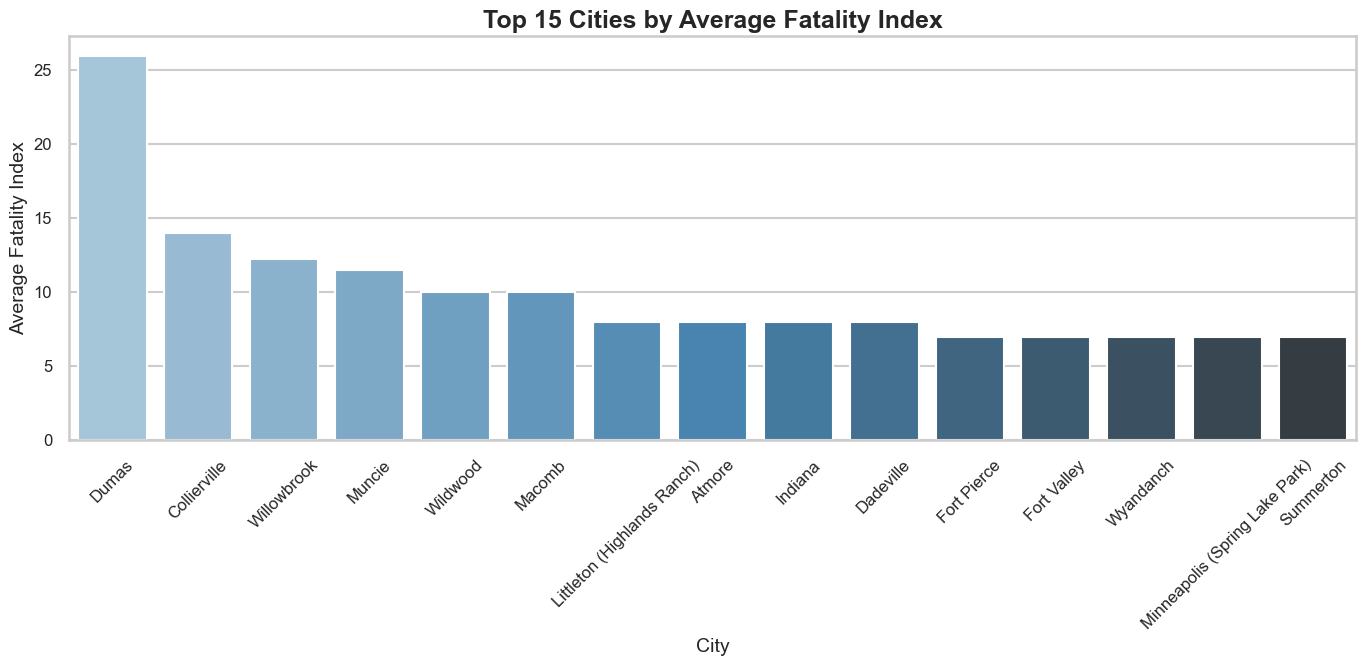

C:\Users\devra\AppData\Local\Temp\ipykernel_16620\2435014191.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_fatality.index, y=state_fatality.values, palette='Reds_d')


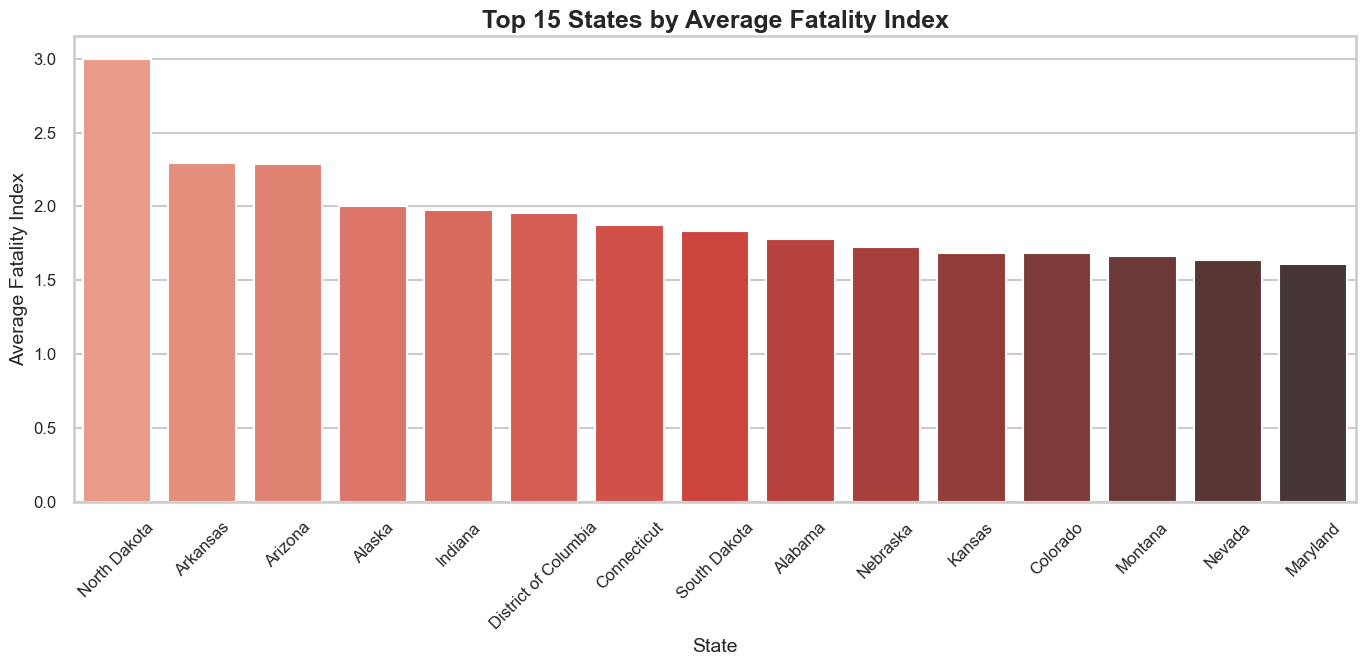

In [20]:
''' 
Fatality Index = (# of Victims Killed) / (# of Victims Injured)
'''

import pandas as pd
import matplotlib.pyplot as plt


# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Calculate the Fatality Index (Victims Injured / Victims Killed)
df['Fatality Index'] = df.apply(
    lambda row: row['Victims Injured'] / row['Victims Killed'] if row['Victims Killed'] > 0 else 0, axis=1
)

# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# Top 15 Cities by Fatality Index
city_fatality = df.groupby('City Or County')['Fatality Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_fatality.index, y=city_fatality.values, palette='Blues_d')
plt.title('Top 15 Cities by Average Fatality Index', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Fatality Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Fatality Index
state_fatality = df.groupby('State')['Fatality Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_fatality.index, y=state_fatality.values, palette='Reds_d')
plt.title('Top 15 States by Average Fatality Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Fatality Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\devra\AppData\Local\Temp\ipykernel_16620\233084345.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




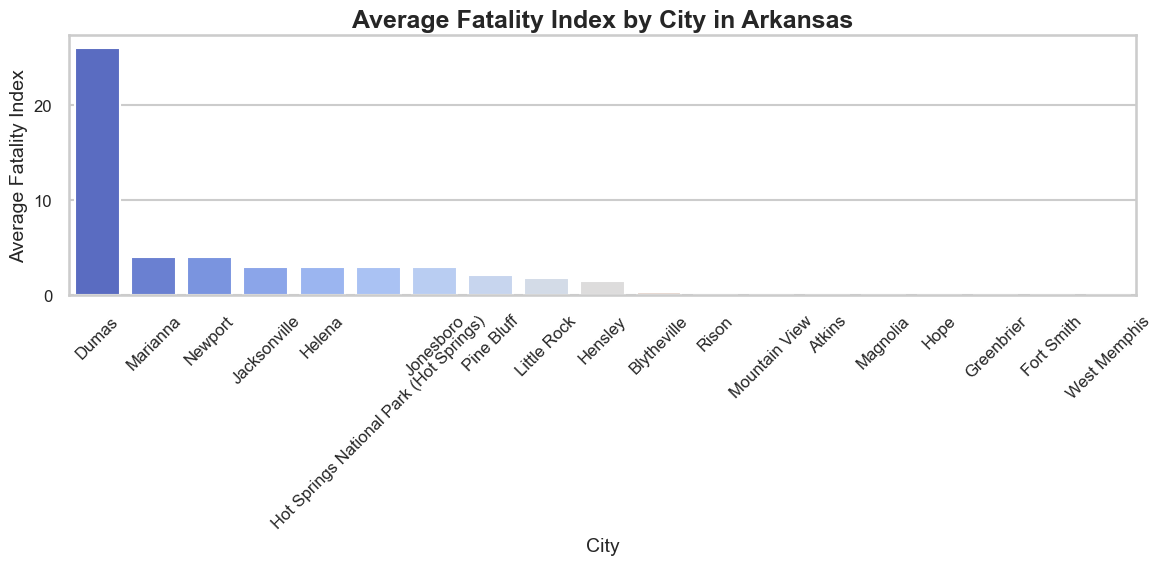

In [32]:
''' 
Specifically looking at North Dakota now
'''

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Calculate the Fatality Index (Victims Injured / Victims Killed)
df['Fatality Index'] = df.apply(
    lambda row: row['Victims Injured'] / row['Victims Killed'] if row['Victims Killed'] > 0 else 0, axis=1
)

# Filter for incidents in North Dakota
north_dakota_data = df[df['State'] == 'Arkansas']

# Group by city and calculate average Fatality Index
city_fatality_nd = north_dakota_data.groupby('City Or County')['Fatality Index'].mean().sort_values(ascending=False)

# Plotting the Average Fatality Index by City in North Dakota
plt.figure(figsize=(12, 6))
sns.barplot(x=city_fatality_nd.index, y=city_fatality_nd.values, palette='coolwarm')
plt.title('Average Fatality Index by City in Arkansas', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Fatality Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Convert full state names to abbreviations
df['State'] = df['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Victims Killed',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Victims Killed': 'Victims Killed'},
    title='Number of Victims Killed by State'
)

# Create choropleth map for victims injured
fig_injured = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Victims Injured',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'Victims Injured': 'Victims Injured'},
    title='Number of Victims Injured by State'
)

# Show the maps
fig_killed.show()
fig_injured.show()